In [2]:
import pandas as pd

In [4]:
from ast import literal_eval

df = pd.read_csv("../../../../../data/clean/classified_435_citypairs_311k_paragraphs_both_methods.csv")
df['merged_POS'] = df['merged_POS'].apply(literal_eval)

In [38]:
topics = sorted(['Sport', 'Art', 'Diplomacy', 'Entertainment', 'Transportation', 'Education'])

In [ ]:
print(df[(df['max'] > 0.9) & (df['merged_POS'].str.len() > 50)].groupby('idxmax')['same_categorisation'].value_counts())
print(df[(df['max'] > 0.9) & (df['merged_POS'].str.len() > 50)].groupby('idxmax')['same_categorisation'].value_counts(normalize=True))

In [35]:

threshold = 0.7
verbose = True

if verbose:
    print('------------------------------------------------------------------------')
    for topic in topics:
        print('\t'*4, 'Topic:', topic)
        print(df[(df['idxmax'] == topic) & (df['max'] > threshold)]['outcome'].value_counts())
        print()
        print(df[(df['idxmax'] == topic) & (df['max'] > threshold)]['outcome'].value_counts(normalize=True))
        print('------------------------------------------------------------------------')
else:
    print('Make "Verbose=True" to load these stats.')

------------------------------------------------------------------------
				 Topic: Sport
sport             27565
education           163
entertainment        95
transportation       71
diplomacy            40
art                  18
Name: outcome, dtype: int64

sport             0.986155
education         0.005831
entertainment     0.003399
transportation    0.002540
diplomacy         0.001431
art               0.000644
Name: outcome, dtype: float64
------------------------------------------------------------------------
				 Topic: Art
art               26204
education          6838
entertainment      1153
sport              1085
transportation      872
diplomacy           614
Name: outcome, dtype: int64

art               0.712724
education         0.185987
entertainment     0.031360
sport             0.029511
transportation    0.023718
diplomacy         0.016700
Name: outcome, dtype: float64
------------------------------------------------------------------------
				 Topic: Diplo

In [26]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

### Average Number of Lemmatised Words for diffently classified paragraphs

In [28]:
merged_pos_len2 = []
for topic in topics:
    values = []
    for threshold in thresholds:
        temp = df[(df['idxmax'] == topic) & ( df['idxmax'].str.lower() != df['outcome']) &(df['max'] > threshold) & (df['merged_POS'].str.len() > 0)]['merged_POS'].str.len()
        values.append(temp.sum()/temp.count())
    merged_pos_len2.append(values)

new_merged_pos_len2 = [[] for x in merged_pos_len2[0]]
for index, topic in enumerate(merged_pos_len2):
    for i, value in enumerate(topic):
        new_merged_pos_len2[i].append(value)
print(new_merged_pos_len2)

[[17.722908093278463, 35.12538699690403, 40.57400631547291, 24.2151051625239, 29.290764300281637, 21.1375724855029], [14.461682242990655, 33.20050177712733, 39.25384158807624, 21.657523510971785, 27.325410231660232, 18.059344552701507], [12.610966057441253, 31.218223148323546, 37.781640168867334, 19.409238542042583, 25.987574781408192, 15.255030621172354], [11.712871287128714, 28.694348173820316, 35.691610266888006, 16.82404540763674, 24.752720079129574, 13.48409669211196], [10.676470588235293, 26.486231465434237, 33.309532572690465, 15.277346506704305, 23.583801122694467, 12.39543057996485]]


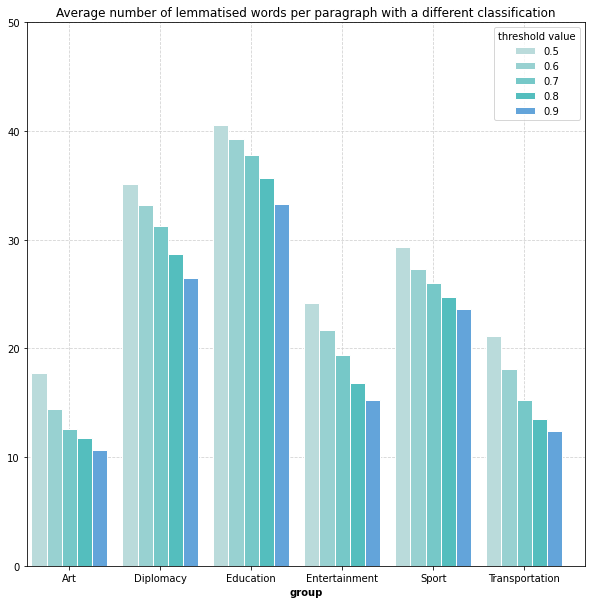

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_merged_pos_len2):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 50)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Average number of lemmatised words per paragraph with a different classification')
plt.legend(title="threshold value")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()

### Average Number of Lemmatised Words for 'correctly' classified paragraphs

In [31]:
merged_pos_len = []
for topic in topics:
    values = []
    for threshold in thresholds:
        temp = df[(df['idxmax'] == topic) & (df['idxmax'].str.lower() == df['outcome']) & (df['max'] > threshold) & (df['merged_POS'].str.len() > 0)]['merged_POS'].str.len()
        values.append(temp.sum()/temp.count())
    merged_pos_len.append(values)

new_merged_pos_len = [[] for x in merged_pos_len[0]]
for index, topic in enumerate(merged_pos_len):
    for i, value in enumerate(topic):
        new_merged_pos_len[i].append(value)
print(new_merged_pos_len)

[[38.25682418550044, 33.24175824175824, 43.22364599862279, 31.123251411141887, 30.296249642141426, 29.32559738696923], [38.24128431005748, 32.888873497939535, 43.32783129883579, 30.379775958963528, 29.982541712518216, 28.214273527189413], [38.27738073644114, 32.31892077545413, 43.44682577242918, 29.495897275289696, 29.55775515334339, 27.092329667190402], [38.452257937290476, 31.46453885097953, 43.42270073546137, 28.38507859733978, 29.099215819979545, 26.048586633492295], [38.50370437707377, 30.21968748298579, 43.024665193669115, 27.222255166483826, 28.716967984205024, 24.918411772388872]]


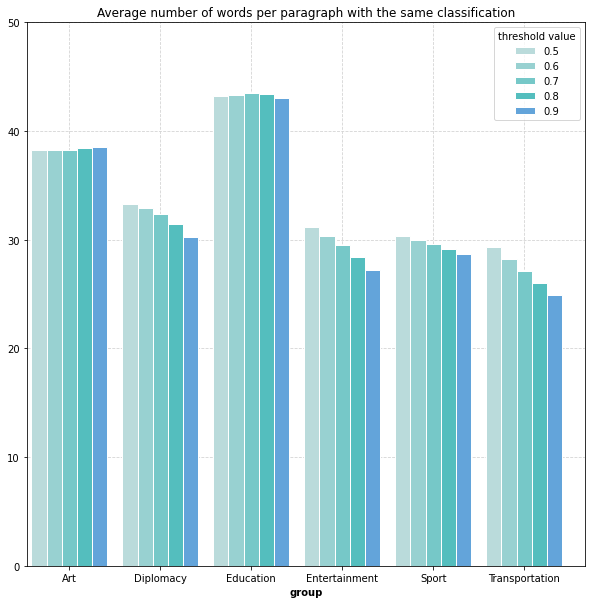

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_merged_pos_len):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 50)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Average number of words per paragraph with the same classification')
plt.legend(title="threshold value")
plt.grid(zorder=0, color='lightgray', linestyle='--')

### Prediction Similarity between LDA Topic Modeling and Word Embedding Categorisation

In [39]:
topic_values = []
for topic in topics:
    values = []
    for threshold in thresholds:
        values.append(df[(df['idxmax'] == topic) & (df['max'] > threshold) & (df['merged_POS'].str.len() > 10)]['same_categorisation'].value_counts(normalize=True)[1])
        #df[(df['idxmax'] == )  & (df['max'] > 0.8)]['outcome'].value_counts(normalize=True)
    topic_values.append(values)

topic_values
new_topic_values = [[] for x in topic_values[0]]
for index, topic in enumerate(topic_values):
    for i, value in enumerate(topic):
        new_topic_values[i].append(value)
print(new_topic_values)

[[0.6232120224515661, 0.626308848213572, 0.9153968114154849, 0.9273030368920779, 0.9844969306003538, 0.7858921161825726], [0.6738017071569271, 0.6806741828948867, 0.9386185283986429, 0.9456775817633308, 0.9896041583366654, 0.8206011006067447], [0.7224614616488797, 0.7319114114510467, 0.955270566155771, 0.9587912707905486, 0.9927786621112707, 0.8508277016554033], [0.7652645339895416, 0.778670700576723, 0.9657672326897728, 0.969725235189084, 0.9942562716445645, 0.8763601081156005], [0.7962574850299401, 0.812526913290272, 0.9708569158971304, 0.9748662395138384, 0.9950865927223195, 0.896755994358251]]


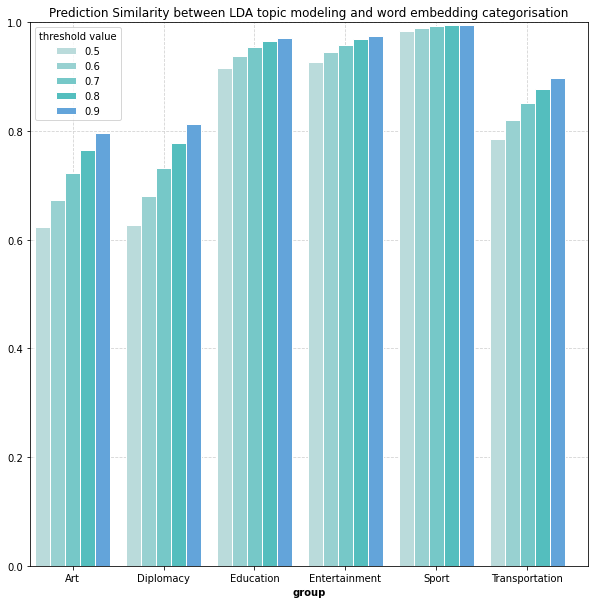

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10), facecolor="w")
# set width of bars
barWidth = 0.25

r1 =  np.arange(0, len(topic_values[0])+3, 1.50)
colors =["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#97d2fb", "#eccbd9", "#eccbd9"]
colors = [ "#badbdb","#98d1d1", "#76c8c8","#54bebe", "#63a4da", "#296ead", "#2a4693"]

for idx, topic in enumerate(new_topic_values):
    plt.bar(r1, topic, color=colors[idx], width=barWidth, edgecolor='white', label=thresholds[idx], zorder=3)
    r1= [x + barWidth for x in r1]

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([0.5, 2, 3.5,  5, 6.5, 8], ['Art', 'Diplomacy', 'Education', 'Entertainment', 'Sport', 'Transportation'])
plt.ylim(0, 1)
plt.xlim(-0.2, 9)

# Create legend & Show graphic
plt.title('Prediction Similarity between LDA topic modeling and word embedding categorisation')
plt.legend(title="threshold value", loc="upper left")
plt.grid(zorder=0, color='lightgray', linestyle='--')
plt.show()